# Simulation of photochemical reaction kinetics under contiuous irradiation of arbitraty irradiation source


$$\frac{\mathrm d \mathbf c}{\mathrm dt}=\frac{q_{mol}^0}{V}\boldsymbol\Phi\int \frac{ \mathbf{c}\circ \boldsymbol{\varepsilon}}{\mathbf c\cdot \boldsymbol{\varepsilon}}\left(1-10^{-l\mathbf c\cdot \boldsymbol{\varepsilon}}\right)I_S(\lambda)\mathrm d\lambda$$

Where $\mathbf c=
\begin{bmatrix}
     c_1(t) \\
     c_2(t) \\
     \vdots  \\
     c_n(t) 
\end{bmatrix}
$ is a concentration vector of total $n$ components and $\boldsymbol\varepsilon=
\begin{bmatrix}
     \varepsilon_1(\lambda) \\
     \varepsilon_2(\lambda) \\
     \vdots  \\
     \varepsilon_n(\lambda) 
\end{bmatrix}
$ is molar abs. coefficient vector that contains molar abs. coefficients of all $n$ components. $\mathbf K=
\begin{bmatrix}
     -\Phi_{1\rightarrow} & \Phi_{2\rightarrow1}  & \dots  & \Phi_{n\rightarrow 1} \\
     \Phi_{1\rightarrow2} & -\Phi_{2\rightarrow} & \dots  & \Phi_{n\rightarrow 2} \\
     \vdots  & \vdots & \ddots & \vdots \\
     \Phi_{1\rightarrow n} & \Phi_{2\rightarrow n}  & \dots  & -\Phi_{n\rightarrow} 
\end{bmatrix}
$ is transfer matrix. The main diagonal contains total decaying quantum yields of each compoent. Off-diagonal elements represents transition quantum yields between compartments. Finally, the $I_S(\lambda)$ is spectrum of irradiation source which is normallized $\int_{-\infty}^{+\infty}I_S(\lambda)\mathrm d\lambda=1$. In principle, Kasha rule is not followed in many photochemical reactions (eg. photoisomerizations) and therefore quantum yield depends on wavelength. In this case, the transfer matrix $\mathbf K$ is function of wavelength and should be put inside the integral. However, transfer matrix can be left outside of the integral at the cost of averaging of quantum yields for particular irradiation source. 

The simple example is cis-trans isomerization of alkene if both isomers are thermally stable. The equation for E and Z isomers would be as follow:

$$\frac{\mathrm d }{\mathrm dt}
\begin{bmatrix}
     c_{\mathrm E}(t) \\
     c_{\mathrm Z}(t) 
\end{bmatrix}
=\frac{q_{mol}^0}{V}
\begin{bmatrix}
     -\Phi_{\mathrm E\rightarrow\mathrm Z} & \Phi_{\mathrm Z\rightarrow\mathrm E} \\
     \Phi_{\mathrm E\rightarrow\mathrm Z} & -\Phi_{\mathrm Z\rightarrow\mathrm E}
\end{bmatrix}
\int \begin{bmatrix}
     c_{\mathrm E}(t)\varepsilon_{\mathrm E}(\lambda) \\
     c_{\mathrm Z}(t)\varepsilon_{\mathrm Z}(\lambda) 
\end{bmatrix}
\frac{1-10^{-l(c_{\mathrm E}(t)\varepsilon_{\mathrm E}(\lambda) + c_{\mathrm Z}(t)\varepsilon_{\mathrm Z}(\lambda))}}{c_{\mathrm E}(t)\varepsilon_{\mathrm E}(\lambda) + c_{\mathrm Z}(t)\varepsilon_{\mathrm Z}(\lambda)}I_S(\lambda)\mathrm d\lambda$$

which splits into set of two coupled ordinary differential equations with no analytical solution (if we irradiate at single wavelength $\lambda_{irr}$). The second equation is not necessary in this case, because of conservation of mass. The sum of concentrations of E and Z is constant and equal to total starting concentration. Also, this is clear from transfer matrix, because it has not full rank! In cases when $\mathbf K$ has full rank, all equations must be solved.


$$\begin{align*}
\frac{\mathrm d c_{\mathrm E}(t)}{\mathrm dt} &= \frac{q_{mol}^0}{V}\frac{1-10^{-l(c_{\mathrm E}(t)\varepsilon_{\mathrm E}(\lambda_{irr}) + c_{\mathrm Z}(t)\varepsilon_{\mathrm Z}(\lambda_{irr}))}}{c_{\mathrm E}(t)\varepsilon_{\mathrm E}(\lambda_{irr}) + c_{\mathrm Z}(t)\varepsilon_{\mathrm Z}(\lambda_{irr})}\Big( \Phi_{\mathrm Z\rightarrow\mathrm E} c_{\mathrm Z}(t)\varepsilon_{\mathrm Z}(\lambda_{irr}) - \Phi_{\mathrm E\rightarrow\mathrm Z} c_{\mathrm E}(t)\varepsilon_{\mathrm E}(\lambda_{irr})  \Big)\\
c_0 &= c_{\mathrm E}(t) + c_{\mathrm Z}(t)
\end{align*}$$



In [1]:
import numpy as np  # import numpy package (abbreviation stands for Numerical Python)
import matplotlib.pyplot as plt  # we plot graphs with this library
from numba import njit, jit

# t, w = times.shape[0], wavelengths.shape[0]  # dimensions of times and wavelenths
# t, w

c:\users\dominik\appdata\local\programs\python\python37\lib\site-packages\numpy\_distributor_init.py:32: UserWarning: loaded more than 1 DLL from .libs:
c:\users\dominik\appdata\local\programs\python\python37\lib\site-packages\numpy\.libs\libopenblas.PYQHXLVVQ7VESDPUVUADXEVJOBGHJPAY.gfortran-win_amd64.dll
c:\users\dominik\appdata\local\programs\python\python37\lib\site-packages\numpy\.libs\libopenblas.TXA6YQSD3GCQQC22GEQ54J2UDCXDXHWN.gfortran-win_amd64.dll
  stacklevel=1)


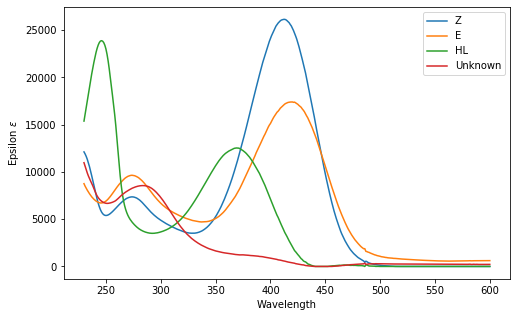

In [2]:
# load experimental epsilons
fname = r'C:\Users\Dominik\Desktop\snth\fit-A.csv'
fname2 = 'epsilons251-559-new.txt'
eps = np.loadtxt(fname, delimiter=',', dtype=np.float64, skiprows=1)

wavelengths = eps[:, 0] + 230
ST = eps[:, 1:].T  # ST is a matrix of n x w
n = ST.shape[0]  # number of absorbing species

names = ['Z', 'E', 'HL', 'Unknown']

# plot created spectra
plt.rcParams['figure.figsize'] = [8, 5]
for i in range(n):
    plt.plot(wavelengths, ST[i], label=names[i])
plt.xlabel('Wavelength')
plt.ylabel('Epsilon $\epsilon$')
plt.legend()
plt.show()

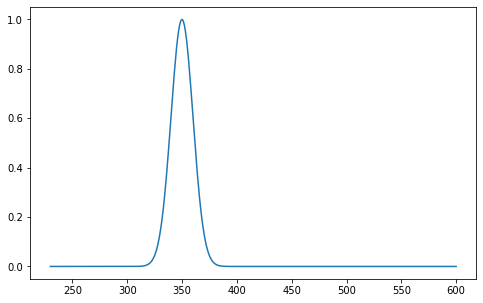

In [45]:
def gauss(x, mu, sigma):
    return np.exp(- (x - mu) * (x - mu) / (2 * sigma * sigma))

plt.rcParams['figure.figsize'] = [8, 5]
I_source = gauss(wavelengths, 350, 10)
# I_source /= np.trapz(I_source)
plt.plot(wavelengths, I_source, label='irrsource')
plt.show()

In [ ]:
from scipy.integrate import odeint
import math
np.seterr(all='warn')

def find_nearest_idx(array, value):
    idx = np.searchsorted(array, value, side="left")
    if idx > 0 and (idx == len(array) or math.fabs(value - array[idx - 1]) < math.fabs(value - array[idx])):
        return idx - 1
    else:
        return idx
def find_nearest(array, value):
    idx = find_nearest_idx(array, value)
    return array[idx]

def fk_factor(x, c=np.log(10), tol=1e-2):
    # exp(-xc) = 1 - xc + (xc)^2 / 2 - (xc)^3 / 6 ...
    # (1 - exp(-xc)) / x  ~  c - xc^2 / 2 for low x
    return np.where(x<=tol, c - x*c*c/2 + x*x*c*c*c/6, (1-np.exp(-x*c)) / x)

# @njit(fastmath=True)
def _calc_q_rel(eps, c, wls, l=1, I_source=None):
    # c is t x n matrix, eps is n x w matrix

#     assert I_source.shape[0] == wls.shape[0]

    I_source /= np.trapz(I_source, x=wls)  # normalize irr source spectrum
    ln10 = np.log(10)
    # c_eps is   t x n x w   matrix
    c_eps = c[..., None] * eps[None, ...]
#     c_eps = c.reshape((c.shape[0], -1, 1)) * eps.reshape((1, -1, eps.shape[1]))

    # sum in second dimension to produce   t x 1 x w   matrix
    c_dot_eps = c_eps.sum(axis=1, keepdims=True)

#     x_abs = c_eps * (1 - np.exp(-l * c_dot_eps * ln10)) / c_dot_eps
    x_abs = c_eps * fk_factor(c_dot_eps, c=l * np.log(10))

    # integrate along wavelengths (the third) dimension
    q_rel = np.trapz(x_abs * I_source, x=wls, axis=2)

    return q_rel.squeeze()

def simulate(q0, V, c0, eps, K, times, wavelengths, l=1, I_source=None, w_irr=None):
    """
    c0 is concentration vector at time, defined in times arary as first element (initial condition), eps is vector of molar abs. coefficients,
    I_source is spectrum of irradiaiton source if this was used,
    if not, w_irr as irradiaton wavelength must be specified, K is transfer matrix, l is length of a cuvette, default 1 cm
    times are times for which to simulate the kinetics
    """
    n = eps.shape[0]  # eps are epsilons - n x w matrix, where n is number of species and w is number of wavelengths
    assert n == K.shape[0] == K.shape[1]
    c0 = np.asarray(c0)
    
    if I_source is None and w_irr is None:
        raise ValueError("Either specify I_source or irradiation wavelength w_irr!")
        
    K_rank = np.linalg.matrix_rank(K)
    print(f'rank: {K_rank}')
    assert K_rank >= n - 1  # rank of a transfer matrix cannot be less than n - 1
    if K_rank < n:  # transfer matrix has not a full rank -> do not simulate the last equation!
        c_tot = c0.sum()  # conservation of mass holds, calculate the total initial concentration
        assert c_tot != 0  # sum of all initial concentration of components cannot be zero
        K = K[:-1]  # remove the last row of K matrix
        
    integrate = w_irr is None
    eps_w_irr = np.zeros(eps.shape[0])  # define epsilons only at irradiaton wavelength
    if not integrate:
        w_idx = find_nearest_idx(wavelengths, w_irr)
        for i in range(n):
            eps_w_irr[i] = eps[i][w_idx]
    else:
        I_source /= np.trapz(I_source, x=wavelengths)  # normalize irr source spectrum
        
    ln10 = np.log(10)
    
    def dc_dt(c, t):
        # if K has full rank, simulate all equations, but if not, calculate the concentration of
        # last component by conservation of mass, c_tot - c1 - c2 - ... - cn
        _c = c if K_rank == n else np.append(c, c_tot - c.sum()) 
        
        c_eps = _c.reshape((-1, 1)) * eps if integrate else (_c * eps_w_irr).reshape((-1, 1))  # hadamard product
        c_dot_eps = c_eps.sum(axis=0)  # dot product, 1D array for integrated version, scalar number for one-wavelength version
        
#         x_abs = c_eps * (1 - np.exp(-l * c_dot_eps * ln10)) / c_dot_eps  # calculate part of absorbed light for each component
        x_abs = c_eps * fk_factor(c_dot_eps, c=l * ln10)
        
        integrals = np.trapz(x_abs * I_source, x=wavelengths, axis=1) if integrate else x_abs  # integrate if source spectrum is defined
                             
        return q0 * np.dot(K, integrals).flatten() / V  # final matrix multiplication

    result = odeint(dc_dt, c0 if K_rank == n else c0[:-1], times)
    
    if K_rank < n:
        # calculate the time profile for last component and stack it to results
        result = np.hstack((result, c_tot - result.sum(axis=1, keepdims=True))) 
    return result


Phi_ZE = 0.35  # Z to E isomerizaton
Phi_EZ = 0.35  # E to Z isomerizaton
Phi_EHL = 0.1  # E to HL electrocyclization
Phi_HLE = 0.1  # HL to E electrocyclization
Phi_HLD = 0.05  # 
Phi_ZD = 0.001  # 
Phi_ED = 0.005  # 
Phi_D = 0.0
# Phi_HLBl = 0.01  # HL photobleaching

c0 = 3e-5
w_irr = 456

times = np.arange(0, 210)  # linear space of times from 0 to 499 in arbitrary units
t = times.shape[0]
C = np.zeros((t, n))  # define concentration matrix with dimensions t x n.

K = np.asarray([[-Phi_ZE, Phi_EZ, 0, 0],
                [Phi_ZE, -Phi_EZ -Phi_EHL, Phi_HLE, 0],
                [0, Phi_EHL, -Phi_HLD -Phi_HLE, 0],
                [0, 0, Phi_HLD, 0]])

# K = np.asarray([
#                 [-Phi_ZE, Phi_EZ, 0],
#                 [Phi_ZE, -Phi_EZ - Phi_EHL, 0],
#                 [0, Phi_EHL, 0]
#                ])

# print(np.linalg.matrix_rank(K), q_rel.shape)

C = simulate(10e-5, 4, [c0, 0, 0, 0], ST, K, times, wavelengths, l=1, I_source=I_source, w_irr=None)

q_rel = _calc_q_rel(ST, C, wavelengths, I_source=I_source)

# plot concentration profiles
plt.rcParams['figure.figsize'] = [18, 10]
plt.subplot(2, 2, 1)
for i in range(n):
    plt.plot(times, C[:, i], label=names[i])
plt.plot(times, C.sum(axis=1), label='+'.join(names), linestyle='--')
plt.xlabel('Time')
plt.ylabel('Concentration (M)')
plt.legend()

D = C @ ST  # compute data matrix

# plot time-dependent spectra
plt.subplot(2, 2, 2)
for i in reversed(range(0, t, 30)):
    plt.plot(wavelengths, D[i], color=(1, i/t, 0, (t-i/1.4)/t), label='$t = {}$'.format(times[i]), lw=1)
plt.plot(wavelengths, I_source / I_source.max(), label='irrsource', linestyle='--', color='black', lw=0.8)
plt.title("Spectra")
plt.xlabel('Wavelength (nm)')
plt.ylabel('Absorbance')

plt.subplot(2, 2, 3)
for i in range(n):
    plt.plot(times, q_rel[:, i], label=names[i])
plt.plot(times, q_rel.sum(axis=1), label='q' + '+'.join(names), linestyle='--')
plt.xlabel('Time')
plt.ylabel('$q(t)/q^0_{mol}$')
plt.legend()

plt.show()


In [25]:
D.shape[0] * D.shape[1]

183000

In [26]:
A = np.asarray([1, 2, 3])

In [34]:
# A = A.reshape(-1, 1)
B = np.asarray([1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12]).reshape(3, 4)
A @ B


array([38, 44, 50, 56])

In [38]:
Q = A.reshape(-1, 1)
W = np.asarray([5, 9, 7]).reshape(-1, 1)
Q.T @ W

array([[44]])

c:\users\dominik\appdata\local\programs\python\python37\lib\site-packages\ipykernel_launcher.py:8: RuntimeWarning: invalid value encountered in true_divide
  


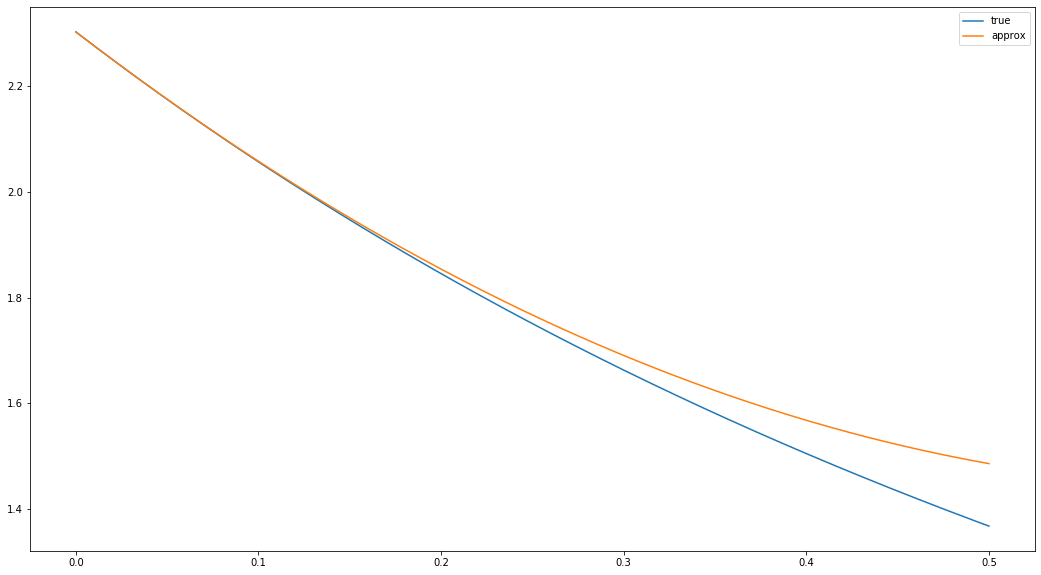

In [110]:
np.seterr(all='warn')
x = np.linspace(0, 0.5, 1000)
l = 1

def f(x, c=np.log(10), tol=1e-2):
    # exp(-xc) = 1 - xc + (xc)^2 / 2 - (xc)^3 / 6 ...
    # (1 - exp(-xc)) / x  ~  c - xc^2 / 2 for low x
    return np.where(x<=tol, c - x*c*c/2 + x*x*c*c*c/6, (1-np.exp(-x*c)) / x)

y = f(x, tol=1e-6)
y1 = f(x, tol=1)

# y, np.log(10)

plt.plot(x, y, label='true')
plt.plot(x, y1, label='approx')
plt.legend()
plt.show()
# y, np.log(10)